In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np


In [6]:
# Define paths
base_dir = "D:/AI Algorithm/cucumber/"
train_dir = base_dir + "train/"
validate_dir = base_dir + "validation/"
test_dir = base_dir + "test/"

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validate_data = validate_datagen.flow_from_directory(validate_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)


Found 690 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [7]:
# Load pretrained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validate_data
)


C:\Users\Anurag\cnn_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 115s 5s/step - accuracy: 0.6581 - loss: 0.6880 - val_accuracy: 0.7696 - val_loss: 0.5075
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.7648 - loss: 0.5098 - val_accuracy: 0.7913 - val_loss: 0.4145
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8228 - loss: 0.4429 - val_accuracy: 0.8739 - val_loss: 0.3519
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.8537 - loss: 0.3856 - val_accuracy: 0.8739 - val_loss: 0.3138
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.8799 - loss: 0.3319 - val_accuracy: 0.8739 - val_loss: 0.2888
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8858 - loss: 0.3024 - val_accuracy: 0.8826 - val_loss: 0.2595
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9133 - loss: 0.2709 - val_accuracy: 0.8783 - val_loss: 0.2459
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9229 - loss: 0.2481 - val_accuracy: 0.8783 - v

In [9]:
# Predict on test data
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
y_true = test_data.classes

# Classification Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
f1 = f1_score(y_true, y_pred, zero_division=1)
try:
    auc = roc_auc_score(y_true, y_pred_probs.ravel())
except ValueError:
    auc = 0.0
conf_matrix = confusion_matrix(y_true, y_pred)

# Regression Metrics
mae = mean_absolute_error(y_true, y_pred_probs.ravel())
mse = mean_squared_error(y_true, y_pred_probs.ravel())
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_true, y_pred_probs.ravel())
r2 = r2_score(y_true, y_pred_probs.ravel())
mbd = np.mean(y_pred_probs.ravel() - y_true)

# Print metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}\n")

print("Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
Classification Metrics:
Accuracy: 0.9655
Precision: 0.9702
Recall: 0.9819
F1-Score: 0.9760
AUC: 0.9892
Confusion Matrix:
[[ 61   5]
 [  3 163]]

Regression Metrics:
Mean Absolute Error (MAE): 0.1149
Mean Squared Error (MSE): 0.0380
Root Mean Squared Error (RMSE): 0.1950
Explained Variance Score: 0.8134
R^2 Score: 0.8132
Mean Bias Deviation (MBD): 0.0063


In [10]:
# Save the model
model.save('vgg_net16.h5')
# Save the model in the recommended Keras format
model.save("vgg_net16.keras")  # Save in the .keras format
print("Model saved successfully!")

Model saved successfully!


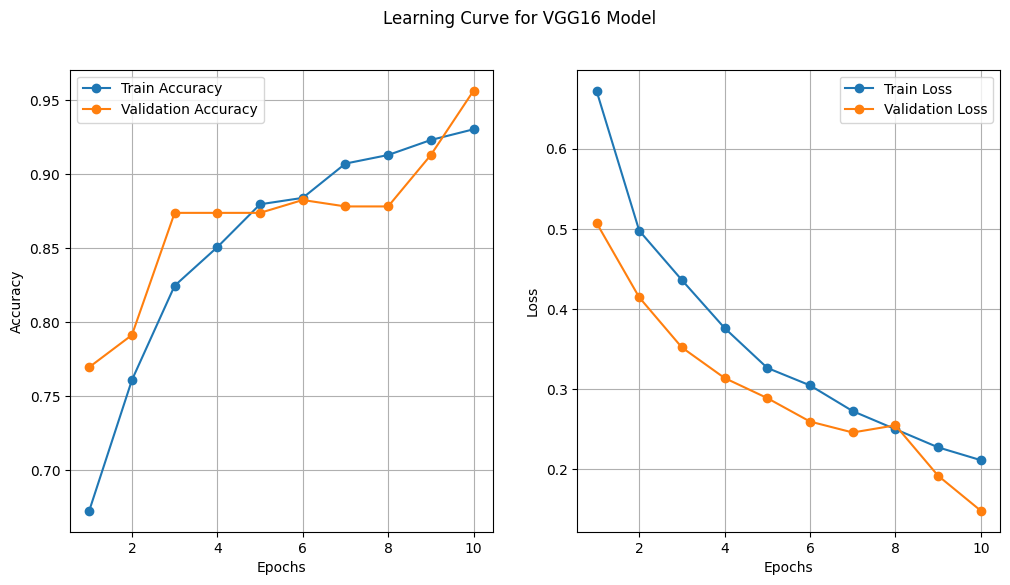

In [14]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy vs. epochs
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss vs. epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Set a common title
plt.suptitle('Learning Curve for VGG16 Model')
plt.show()